In [123]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import copy

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [93]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)
# make_blobs returns a tuple of 2 values:
# a 2D numpy array with the x and y coordinates
# a 1D array with the cluster label

In [94]:
features[:5] # first 5 x and y coordinates

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [95]:
true_labels[:5] # and their labels

array([1, 0, 2, 2, 2])

In [96]:
# Let's build a dataframe:
df = pd.DataFrame(features)
df

,0,1
0,9.770759,3.276210
1,-9.713497,11.274518
2,-6.913306,-9.347559
3,-10.861859,-10.750635
4,-8.500380,-4.543704
...,...,...
195,-6.024631,-2.822880
196,2.677814,9.494375
197,1.833638,11.124732
198,3.342066,4.967784


In [97]:
# k-means (based on Euclidean distance) is not scale-invariant. We need to perform some feature scaling
scaler = StandardScaler() # each features is scaled in order to have a mean of 0 and a standard deviation of 1
scaled_features = scaler.fit_transform(df.values)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [98]:
# In order to not lose the original index we build a df
std_df = pd.DataFrame(scaled_features, index=df.index)
std_df

,0,1
0,2.130821,0.256044
1,-1.526985,1.410367
2,-1.001302,-1.565832
3,-1.742569,-1.768325
4,-1.299245,-0.872534
...,...,...
195,-0.834469,-0.624183
196,0.799253,1.153455
197,0.640774,1.388750
198,0.923954,0.500173


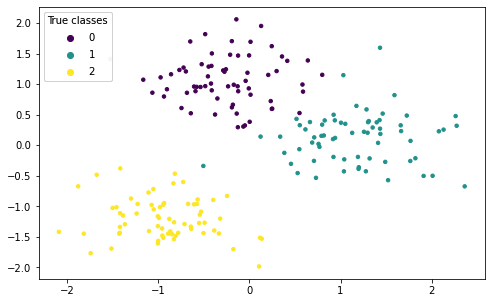

In [99]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(std_df[0], std_df[1], s=12, c=true_labels, marker="o", label='data')
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="True classes")
ax.add_artist(legend1)
plt.show()

In [100]:
std_df_label = pd.concat([std_df, pd.DataFrame(true_labels, columns = ['true_label'])], axis = 1)
std_df_label

,0,1,true_label
0,2.130821,0.256044,1
1,-1.526985,1.410367,0
2,-1.001302,-1.565832,2
3,-1.742569,-1.768325,2
4,-1.299245,-0.872534,2
...,...,...,...
195,-0.834469,-0.624183,2
196,0.799253,1.153455,0
197,0.640774,1.388750,0
198,0.923954,0.500173,1


In [101]:
#plt.scatter(
#    std_df_label[0],
#    std_df_label[1],
#    marker='o',
#    c=std_df_label['true_label'],
#    s=25, 
#    edgecolor='k'
#)

In [102]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10, # how many random initiatilizations of the centroids are performed (default is 10)
    max_iter=300,
    random_state=42
)

In [103]:
kmeans.fit(std_df.values)#scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [104]:
kmeans.inertia_
# The lowest SSE (sum of squared errors) value

74.57960106819854

In [105]:
kmeans.n_iter_
# The number of iterations to converge

6

In [106]:
centroids = kmeans.cluster_centers_
centroids
# Final location of the centroids

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [107]:
xc, yc = centroids.T

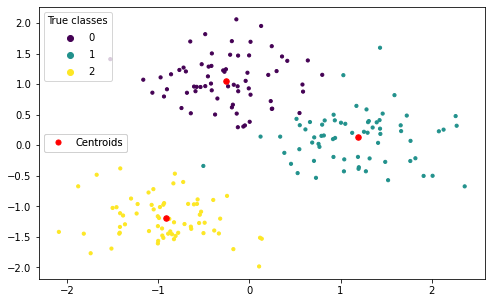

In [108]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)

data = ax1.scatter(std_df[0], std_df[1], s=10, c=true_labels, marker="o", label='data')
legend_data = ax1.legend(*data.legend_elements(), loc="upper left", title="True classes")
cent = ax1.scatter(xc, yc, s=30, c='r', marker="o", label='centroids')
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=5, label='Centroids')
legend_cent = plt.legend(handles=[red_dot], loc='center left')
ax1.add_artist(legend_data)
ax1.add_artist(legend_cent)
plt.show()

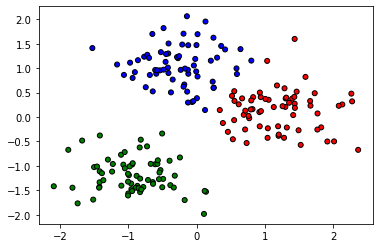

In [109]:
# Let's plot the clusters as labeled by kmeans:
fte_colors = {
    0: "red",
    1: "blue",
    2: "green",
}
km_colors = [fte_colors[label] for label in kmeans.labels_]
#ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
plt.scatter(
    #scaled_features[:, 0], 
    #scaled_features[:, 1], 
    std_df[0],
    std_df[1],
    marker='o',
    c=km_colors,
    s=25, 
    edgecolor='k'
)

[0 1 2 2 2 2 1 2 0 2 0 0 0 0 1 2 1 2 0 2 0 0 2 1 2 1 1 2 1 0 0 0 2 2 1 1 2
 1 2 1 0 1 2 0 2 0 0 2 0 1 2 1 2 1 1 1 2 0 1 0 2 1 2 2 2 2 1 1 2 1 1 2 1 0
 0 0 0 1 0 1 1 0 2 2 2 2 2 1 0 2 0 1 1 1 0 2 1 0 0 1 2 2 1 2 1 0 2 0 0 2 0
 0 1 2 1 2 2 1 1 1 2 0 1 2 2 0 1 1 0 1 0 2 1 2 2 0 0 0 1 0 1 1 2 0 0 1 0 2
 2 0 1 2 0 2 0 2 2 1 0 0 1 0 0 2 1 0 0 1 2 0 2 1 0 2 1 0 1 1 1 0 1 0 2 2 2
 1 0 0 0 1 1 0 2 2 1 2 1 1 0 0]
[1 0 2 2 2 2 0 2 1 2 1 1 1 1 1 2 0 2 1 2 1 1 2 0 2 0 0 2 0 1 1 1 2 2 0 0 2
 0 2 0 1 0 2 1 2 1 1 2 1 0 2 0 2 0 0 0 2 1 0 1 2 0 2 2 2 2 0 0 2 0 0 2 0 1
 0 1 1 0 1 0 0 1 1 2 2 2 2 0 1 2 1 0 0 0 1 2 0 1 1 0 2 2 0 2 0 1 2 1 1 2 1
 1 0 2 0 2 2 0 0 0 2 1 0 2 2 1 0 0 1 0 1 2 0 2 2 1 1 1 0 1 0 0 2 1 1 0 1 2
 2 1 0 2 1 2 1 2 2 0 1 1 0 1 1 2 0 1 1 0 2 1 2 0 1 2 0 1 0 0 0 1 0 1 2 2 2
 0 1 1 1 0 0 1 2 2 0 2 0 0 1 1]


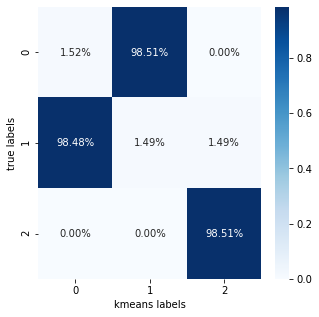

In [140]:
# Let's say we want to associate k-means clusters with true labels
print(kmeans.labels_)
print(true_labels)
# print("*********")
# dic = {0: 'A', 1: 'B', 2: 'C'}
# new_labels = [dic[i] for i in kmeans.labels_]
# print(new_labels)

# We can see at the confusion matrix telling us the most frequent true class
cf_matrix = confusion_matrix(true_labels, kmeans.labels_)
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix / sum(cf_matrix), fmt = '.2%', annot=True, cmap='Blues')
plt.xlabel("kmeans labels")
plt.ylabel("true labels")
plt.show()

In [15]:
# If we don't know how many clusters are present, or rather which is the approprate number of clusters, we can use:
# - the elbow method
# - the silhouette coefficient

In [16]:
# Elbow: we loop kmeans over different k values and we plot the SSE:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

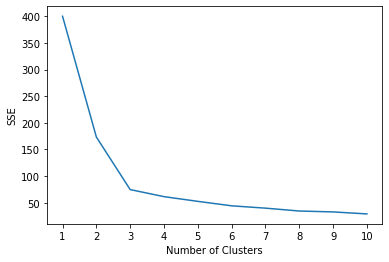

In [17]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
# We see the elbow at 3 clusters

In [18]:
# Sometimes it's not clear where the elbow is. We can use the silhouette coefficient which measures cluster cohesion and separation. 
# It quantifies how well a data point fits into its assigned cluster based on two factors:
# - How close the data point is to other points in the cluster
# - How far away the data point is from points in other clusters
# Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their 
# clusters than they are to other clusters.

In [19]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

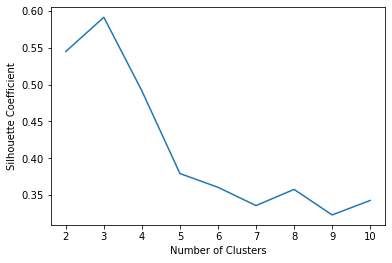

In [20]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
# The maximum is for 3 clusters

In [21]:
# When we know the real number of clusters, as in this case, we can evaluate by just comparing the
# adjusted random score:
ari_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    ari = adjusted_rand_score(true_labels,kmeans.labels_)
    ari_scores.append(ari)

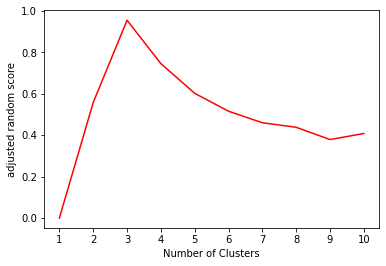

In [22]:
plt.plot(range(1, 11), ari_scores, c="red")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("adjusted random score")
plt.show()